## Imports 

In [1]:
import matplotlib.pyplot as plt
import inflection
import numpy as np
import pandas as pd
import streamlit as st


## Functions

In [11]:
def setup_dark_mode():
    """
        Sets up matplotlib to use dark mode with a light green dashed grid.
        
    """
    # Set the background color to dark
    plt.rcParams['figure.facecolor'] = '#262626'
    
    # Set the grid color to light green
    plt.rcParams['grid.color'] = '#90EE90'
    
    # Set the grid linestyle to dashed
    plt.rcParams['grid.linestyle'] = '--'
    
    # Optionally, set the tick color to contrast against the dark background
    plt.rcParams['xtick.color'] = 'white'
    plt.rcParams['ytick.color'] = 'white'
    
    # Optionally, set the axis label color to contrast against the dark background
    plt.rcParams['axes.labelcolor'] = 'white'
    
    # Optionally, set the text color for the legend to contrast against the dark background
    plt.rcParams['legend.facecolor'] = 'black'
    plt.rcParams['legend.edgecolor'] = 'white'
    plt.rcParams['legend.framealpha'] = 0.9
    
    # Apply the dark mode style globally
    plt.style.use('dark_background')
    return None

def general_info(df):  
    """
    Prints General Info details
    
    """
    total_text_ratings       = df['rating_text'].notna().sum()
    unique_restaurants_name  = df['restaurant_name'].unique()
    unique_restaurants_id    = df['restaurant_id'].unique()
    unique_countries         = df['country_code'].unique()
    total_ratings            = df['votes'].notna().sum()
    unique_cousines          = df['cuisines'].unique()
    unique_cities            = df['city'].unique()
    
    line = "------------- --- ------------- --- ------------- --- ------------- --- -------------\n\n"
    
    # 1 How many unique restaurants are registered?
    print(f"Number of unique restaurants presented is {unique_restaurants_id.shape[0]}\n")
    print(f"Number of unique franchises: {unique_restaurants_name.shape[0]}, considering IDs with the same name as part of the same franchise regardless of location.")
    
    print(line)
    
    # 2 How many unique countries are registered?
    print(f"Number of unique countries presented on sheet is {unique_countries.shape[0]}")
    print(line)
    
    # 3 How many unique cities are registered?
    print(f"Number of unique cities presented on sheet is {unique_cities.shape[0]}")
    print(line)
    
    # 4 What is the total number of reviews made?
    print(f"Total of {total_ratings} numbered ratings and {total_text_ratings} text coments.")
    print(line)
    
    # 5 What is the total number of types of cuisine registered?
    print(f"Number of unique cuisines presented on sheet is {unique_cousines.shape[0]}")
    print(line)

    return None

def plot_bar_view (df_query, filter_column, filtered_column, title, figsize = (10,6)):
    """
         Plots a barplot using matplotlib in the configurations set:   

         Parameters:
                - df_query            = df filtered by a bool query
                - column_filter       = the main col which you are filtering for
                - column_filtered     = col which you desired to group to
                - figsize (optional)  = (10,6) ~ (x,y)
                - title               = defines header of the barplot

        Returns:
                - bar graph 
    """
    
    list_filter_entries   =  df_query [ filter_column ].tolist()
    list_filtered_entries =  df_query [filtered_column].tolist()
    
    # Define a sequence of colors that repeats every two entries
    alternating_colors = ['lightgrey', 'purple', 'lightgrey', 'purple']
    
    # Create the bar plot
    plt.figure(figsize = figsize)  # Optional: Adjust the figure size as needed
    bars = plt.bar(list_filter_entries, list_filtered_entries, color=alternating_colors)
    
    # Customize the plot
    plt.title(title)
    plt.xlabel(filter_column)
    plt.ylabel(filtered_column)
    
    # Rotate x-axis labels by 45 degrees and align them to the right
    plt.xticks(rotation=180, ha='right')
    
    # Add a dashed green grid
    plt.grid(axis='y', linestyle='--', linewidth=0.8, color='green', alpha=0.7)
    
    # Set y-axis to logarithmic scale
    plt.yscale('log')  # This line changes the y-axis to a logarithmic scale
    
    # Add value labels above each bar
    for bar in bars:
        height = bar.get_height()+0.04
        plt.text(bar.get_x() + bar.get_width()/2, 
                 height+0.02, 
                 f'{height:.0f}', 
                 fontsize=8, 
                 ha='center', 
                 va='bottom', 
                 color='black',
                 bbox=dict(facecolor='white', edgecolor='black')
                )
    
    # Show the plot
    plt.tight_layout()  # Ensure layout fits the figure area
    plt.show()

    return None



def aggregator(df_query, column_filter, column_filtered, agg_method='size', max=1, min=0):
    """
        Groups by unique entries in the desired column and applies the specified aggregation method.
    
        Parameters:
                - df_query: DataFrame filtered by a boolean query.
                - column_filter: Main column to filter for grouping.
                - column_filtered: Column to group by.
                - agg_method: Aggregation method to apply ('mean', 'size', or 'nunique'). Default is 'size'.
                - max: Optional; prints max value of query if 1.
                - min: Optional; prints min value of query if 1.
    
        Returns:
                - DataFrame with grouped counts.
                - .idxmax() if requested == 1
                - .idxmin() if requested == 1 
    """

    line = '----------  ---  ----------  ---  ----------  ---  ----------\n'
    # Validate the aggregation method
    valid_methods = ['mean', 'size', 'nunique']
    if agg_method not in valid_methods:
        raise ValueError(f"Unsupported aggregation method '{agg_method}'. Supported methods are 'mean', 'size', and 'nunique'.")
    
    # Group by 'column_filter' and apply the specified aggregation method
    df_aux = df_query.groupby(column_filter)[column_filtered].agg(agg_method).reset_index(name='count')
    
    # Find the entries with the highest and lowest counts
    df_highest_query = df_aux.loc[df_aux['count'].idxmax()]
    df_lowest_query  = df_aux.loc[df_aux['count'].idxmin()]

    
    # Adjust print statements based on the values of max and min
    if max == 1:
        if agg_method == 'mean':
            # Format mean value to 2 decimal places
            formatted_mean = "{:.2f}".format(df_highest_query['count'])
            print(f">   {df_highest_query[column_filter]} is the {column_filter} with the highest average ({formatted_mean})")
        else:
            print(f">   {df_highest_query[column_filter]} is the {column_filter} with most unique entries ({df_highest_query['count']})")
        print(line)
    if min == 1:
        if agg_method == 'mean':
            # Format mean value to 2 decimal places
            formatted_mean = "{:.2f}".format(df_lowest_query['count'])
            print(f">   {df_lowest_query[column_filter]} is the {column_filter} with the lowest average ({formatted_mean})")
        else:
            print(f">   {df_lowest_query[column_filter]} is the {column_filter} with lesser unique entries ({df_lowest_query['count']})")
        print(line)
        
    return df_aux
    
def rename_columns(df1):
    ###  Rename columns removing backspace for undescores  ### 
        # backup of the original code
    df         = df1.copy()
    title      = lambda x: inflection.titleize(x)
    snakecase  = lambda x: inflection.underscore(x)
    spaces     = lambda x: x.replace(" ", "")
    cols_old   = list(df.columns)
    cols_old   = list(map(title, cols_old))
    cols_old   = list(map(spaces, cols_old))
    cols_new   = list(map(snakecase, cols_old))
    df.columns = cols_new
    return df


def tag_fixer(df):
    ### Replace the code for the country name ###
    COUNTRIES = {
        1  : "India",
        14 : "Australia",
        30 : "Brazil",
        37 : "Canada",
        94 : "Indonesia",
        148: "New Zealand",  
        162: "Philippines",
        166: "Qatar",
        184: "Singapore",  #
        189: "South Africa",
        191: "Sri Lanka",
        208: "Turkey",
        214: "United Arab Emirates",
        215: "England",
        216: "United States of America",
    }
    
    ### Translating color codes for establishment score ###
    COLORS = {
    "3F7E00":  "darkgreen",
    "5BA829":      "green",
    "9ACD32": "lightgreen",
    "CDD614":     "orange",
    "FFBA00":        "red",
    "CBCBC8":    "darkred",
    "FF7800":    "darkred",
    }

    ### Translate and standardize Rating comments in text ### 
    RATING_TRANSLATION = {
    "Very Good"     : "Good",
    "Excellent"     : "Excellent",
    "Good"          : "Good",
    "Average"       : "Average",
    "Not rated"     : np.nan,
    "Excelente"     : "Excellent",  
    "Velmi dobré"   : "Good",
    "Veľmi dobré"   : "Good",
    "Poor"          : "Poor",
    "Çok iyi"       : "Good",
    "Biasa"         : "Average",  
    "Bardzo dobrze" : "Good",
    "Sangat Baik"   : "Good",
    "Muy Bueno"     : "Good",
    "Baik"          : "Good",
    "Muito Bom"     : "Good",
    "Skvělá volba"  : "Excellent",
    "Harika"        : "Excellent",
    "Muito bom"     : "Good",
    "Skvělé"        : "Excellent",
    "Terbaik"       : "Excellent",
    "İyi"           : "Good",
    "Vynikajúce"    : "Excellent",
    "Bueno"         : "Good",
    "Bom"           : "Good",
    "Buono"         : "Good",
    "Wybitnie"      : "Excellent",
    "Eccellente"    : "Excellent",
    "Best"          : "Excellent"
    }

    # Converting cost for two to USD, values could be implemented with an API
    TO_DOLLAR = {
    'Dollar($)'             : 1.0,  
    'Real(R$)'              : 0.25, 
    'Pounds(£)'             : 1.36,  
    'Rupees(Rs.)'           : 0.013,  
    'Indonesian Rupiah(IDR)': 0.000063,  
    'Pula(P)'               : 0.18,  
    'Qatari Rial(QR)'       : 0.27,  
    'Rand(R)'               : 0.083,  
    'Sri Lankan Rupee(LKR)' : 0.0033,  
    'Turkish Lira(TL)'      : 0.030,  
    'Emirati Dirham(AED)'   : 0.27  
}
    
    ### Transforming scores from numbers to string for categorical manipulation  ###
    PRICE = {
        1: "cheap",
        2: "normal",
        3: "expensive",
        4: "gourmet"
    }

    # Replace the outlier at index 385 with 250
    outlier_index = 385
    df.at[outlier_index, 'average_cost_for_two'] = 250 # it was affecting the metrics, fixing to 2nd max value 250
    
    #Converting cost for two to USD 
    df["average_cost_for_two"] = (df['average_cost_for_two'] * df["currency"].map(TO_DOLLAR).fillna(0)).round(2)
    
    # Extracts only the first element prior to a coma in each df['cuisine'] cell
    df["cuisines"] = df["cuisines"].astype(str).apply(lambda x: x.split(",")[0])
    df = df.replace({'cuisines': {'nan': np.nan}})

    # Mapping all previous dictionaries to replace columns with desired values
        # Country name per code
    df['country_code'] = df['country_code'].map(COUNTRIES).fillna(df['country_code'])
    
        # Color name per code
    df['rating_color'] = df['rating_color'].map(COLORS).fillna(df['rating_color'])
    
        # Standardize and translate rating comments 
    df['rating_text']  = df['rating_text'].map(RATING_TRANSLATION).where(df['rating_text'].isin(RATING_TRANSLATION.keys()), df['rating_text'])
    
        # Adjusting price range names
    df['price_range']  = df['price_range'].map(PRICE).fillna(df['price_range'])
   
        # Conversions
    to_category = [
        'has_online_delivery',
        'is_delivering_now'  ,
        'has_table_booking'  ,
        'locality_verbose'   ,
        'country_code'       ,
        'rating_color'       ,
        'price_range'        ,
        'rating_text'        ,
        'currency'           ,
        'locality'           ,
        'cuisines'           ,
        'city' 
    ]
    
    for col in to_category:
        df[col] = pd.Categorical(df[col])
    
    return df


In [3]:
def type_check(df):
    
    ### Prints a receipt of every column prior to pre-processing ###
    columns = df.columns
    for col in columns:
        non_na_entries     = df[col].count()
        na_entries         = df[col].isna().sum()
        percentage         = round((non_na_entries / df.shape[0]) * 100, 2)
        unique_entries     = df[col].nunique()
        duplicated_entries = df[col].duplicated().sum()
        line = "------------- --- ------------- --- ------------- --- ------------- --- -------------"
        print(line)
        print(f"Column: {col}")
        print(line)
        print(f"Total entries found: {non_na_entries} out of {df.shape[0]} lines || {percentage}%")
        print(f"Unique entries: {unique_entries}")
        print(f"NaN entries: {na_entries}")
        print(f"Duplicated entries: {duplicated_entries} || {round((duplicated_entries / df.shape[0]) * 100, 2)}%\n" )
        print(f"{df[col].dtypes}\n")

    return df

## Preprocessing

In [4]:
setup_dark_mode()

df1 = pd.read_csv('datasets/zomato.csv')
df = rename_columns(df1)
df = tag_fixer(df)
df = df.drop_duplicates(keep=False)

## Type Summary

In [5]:
df = type_check(df)

------------- --- ------------- --- ------------- --- ------------- --- -------------
Column: restaurant_id
------------- --- ------------- --- ------------- --- ------------- --- -------------
Total entries found: 6359 out of 6359 lines || 100.0%
Unique entries: 6359
NaN entries: 0
Duplicated entries: 0 || 0.0%

int64

------------- --- ------------- --- ------------- --- ------------- --- -------------
Column: restaurant_name
------------- --- ------------- --- ------------- --- ------------- --- -------------
Total entries found: 6359 out of 6359 lines || 100.0%
Unique entries: 5551
NaN entries: 0
Duplicated entries: 808 || 12.71%

object

------------- --- ------------- --- ------------- --- ------------- --- -------------
Column: country_code
------------- --- ------------- --- ------------- --- ------------- --- -------------
Total entries found: 6359 out of 6359 lines || 100.0%
Unique entries: 15
NaN entries: 0
Duplicated entries: 6344 || 99.76%

category

------------- --- ----

In [6]:
df.columns.tolist()

['restaurant_id',
 'restaurant_name',
 'country_code',
 'city',
 'address',
 'locality',
 'locality_verbose',
 'longitude',
 'latitude',
 'cuisines',
 'average_cost_for_two',
 'currency',
 'has_table_booking',
 'has_online_delivery',
 'is_delivering_now',
 'switch_to_order_menu',
 'price_range',
 'aggregate_rating',
 'rating_color',
 'rating_text',
 'votes']

## General Information


In [7]:
general_info(df)

Number of unique restaurants presented is 6359

Number of unique franchises: 5551, considering IDs with the same name as part of the same franchise regardless of location.
------------- --- ------------- --- ------------- --- ------------- --- -------------


Number of unique countries presented on sheet is 15
------------- --- ------------- --- ------------- --- ------------- --- -------------


Number of unique cities presented on sheet is 124
------------- --- ------------- --- ------------- --- ------------- --- -------------


Total of 6359 numbered ratings and 6254 text coments.
------------- --- ------------- --- ------------- --- ------------- --- -------------


Number of unique cuisines presented on sheet is 166
------------- --- ------------- --- ------------- --- ------------- --- -------------




## Country Information

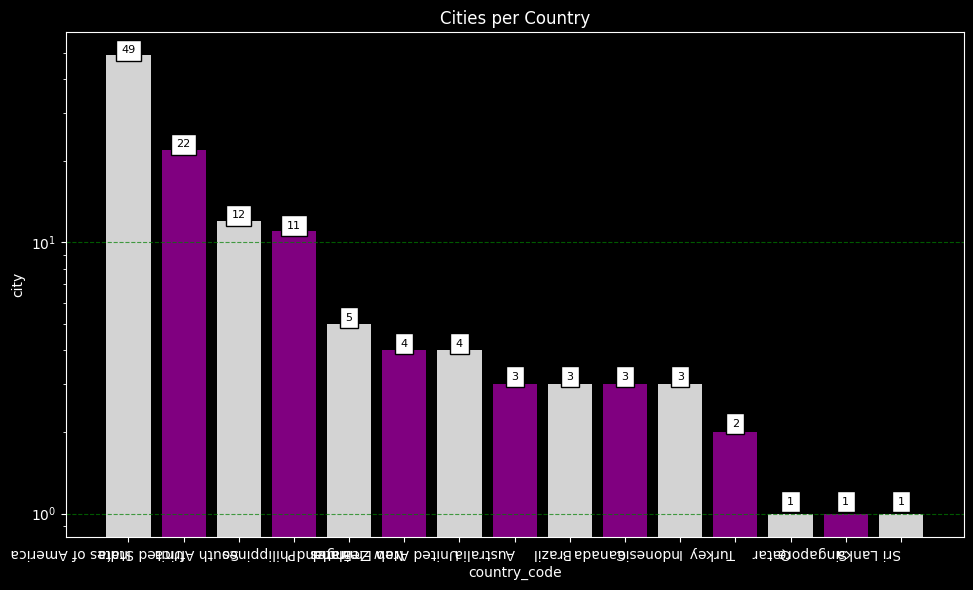

In [8]:
# 1. What is the name of the country with the most registered cities?


df_query = df[['country_code','city']].groupby('country_code').nunique().reset_index()
df_query = df_query.sort_values(by = 'city', ascending = False)
plot_bar_view (df_query, 'country_code', 'city', title = 'Cities per Country')

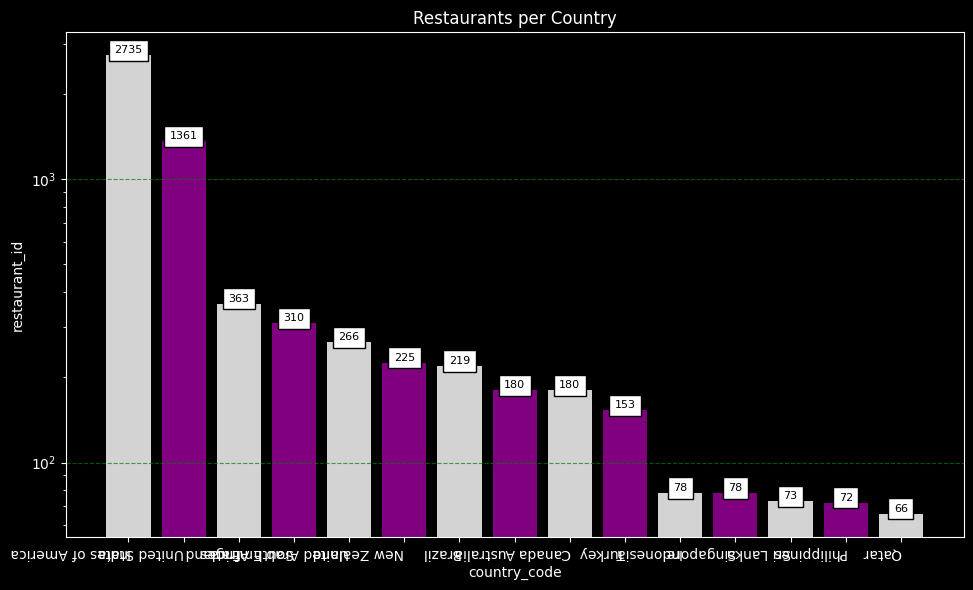

In [9]:
# 2. What is the name of the country with the most registered restaurants?

df_query = df[['country_code','restaurant_id']].groupby('country_code').nunique().reset_index()
df_query = df_query.sort_values(by = 'restaurant_id', ascending = False)
plot_bar_view (df_query, 'country_code', 'restaurant_id', title = 'Restaurants per Country')

In [12]:
# 3. What is the name of the country with the most restaurants with a price level of 'gourmet' registered?

df_query = df[df['price_range'] == 'gourmet']
aggregator(df_query,'country_code','restaurant_id','size',1,1)

>   United States of America is the country_code with most unique entries (414)
----------  ---  ----------  ---  ----------  ---  ----------

>   Sri Lanka is the country_code with lesser unique entries (14)
----------  ---  ----------  ---  ----------  ---  ----------



,country_code,count
0,Australia,33
1,Brazil,137
2,Canada,54
3,England,75
4,India,180
5,Indonesia,16
6,New Zealand,77
7,Philippines,23
8,Qatar,37
9,Singapore,57


In [13]:
# 4. What is the name of the country with the highest number of distinct types of cuisine?

df_query = df[df['cuisines'].notna()]
aggregator(df_query,'country_code','cuisines','nunique',1,1)

>   India is the country_code with most unique entries (74)
----------  ---  ----------  ---  ----------  ---  ----------

>   Philippines is the country_code with lesser unique entries (14)
----------  ---  ----------  ---  ----------  ---  ----------



,country_code,count
0,Australia,43
1,Brazil,43
2,Canada,42
3,England,50
4,India,74
5,Indonesia,21
6,New Zealand,37
7,Philippines,14
8,Qatar,28
9,Singapore,21


In [ ]:
# 5. What is the name of the country with the highest number of reviews made?

df_query = df[df['votes'].notna()]
aggregator(df_query,'country_code','votes','size',1,1)

In [19]:
# 6. What is the name of the country with the highest number of restaurants offering delivery?

df_query   = df.loc[df['is_delivering_now'] == 1]
df_aux = aggregator(df_query,'country_code','restaurant_id','nunique',1,1)
df_aux.sort_values(by= 'count', ascending = False)

>   India is the country_code with most unique entries (1054)
----------  ---  ----------  ---  ----------  ---  ----------

>   Australia is the country_code with lesser unique entries (0)
----------  ---  ----------  ---  ----------  ---  ----------



,country_code,count
4,India,1054
13,United Arab Emirates,49
7,Philippines,7
8,Qatar,3
0,Australia,0
1,Brazil,0
2,Canada,0
3,England,0
5,Indonesia,0
6,New Zealand,0


In [ ]:
# 7. What is the name of the country with the highest number of restaurants accepting reservations?

df_query   = df.loc[df['has_table_booking'] == 1]
aggregator(df_query,'country_code','restaurant_id','nunique',1,1)

In [ ]:
# 8. What is the name of the country with the highest average number of reviews per restaurant?

df_query = df[df['votes'].notna()]
aggregator(df_query,'country_code','votes','size',1,0)

In [21]:
# 9. What is the name of the country with the highest average rating?
# 10. What is the name of the country with the lowest average rating?

df_query = df.loc[df['aggregate_rating'].notna()]
aggregator(df_query,'country_code','aggregate_rating','mean',1,1)

>   Indonesia is the country_code with the highest average (4.60)
----------  ---  ----------  ---  ----------  ---  ----------

>   Brazil is the country_code with the lowest average (3.29)
----------  ---  ----------  ---  ----------  ---  ----------



,country_code,count
0,Australia,4.372778
1,Brazil,3.288584
2,Canada,4.321667
3,England,4.042424
4,India,4.040731
5,Indonesia,4.602564
6,New Zealand,4.161778
7,Philippines,4.465278
8,Qatar,4.201515
9,Singapore,4.441026


In [22]:
# 11. What is the average price of a dish for two people per country?

df_query = df.loc[(df['average_cost_for_two'].notna()) & (df['average_cost_for_two'] != 0)]
aggregator(df_query,'country_code','aggregate_rating','mean',1,1).dropna()

>   Indonesia is the country_code with the highest average (4.60)
----------  ---  ----------  ---  ----------  ---  ----------

>   Sri Lanka is the country_code with the lowest average (4.05)
----------  ---  ----------  ---  ----------  ---  ----------



,country_code,count
0,Australia,4.371751
2,Canada,4.321469
3,England,4.088202
5,Indonesia,4.602564
8,Qatar,4.201515
9,Singapore,4.441026
10,South Africa,4.074098
11,Sri Lanka,4.045833
12,Turkey,4.305882
14,United States of America,4.401774


## City Information


In [ ]:
# 1. What is the name of the city with the most registered restaurants?


df_query = df[df['restaurant_id'] != np.NaN]
aggregator(df_query,'city','restaurant_id','nunique',1,0)

In [ ]:
# 2. What is the name of the city with the most restaurants with an average rating above 4?

df_query = df.loc[df['aggregate_rating'] > 4]
aggregator(df_query,'city','restaurant_id','nunique',1,0)

In [ ]:
# 3. What is the name of the city with the most restaurants with an average rating below 2.5?

df_query = df.loc[(df['aggregate_rating'] < 2.5)]
aggregator(df_query,'city','restaurant_id','nunique',1,0)

In [ ]:
# 4. What is the name of the city with the highest average price of a dish for two people?

df_query = df.loc[df['average_cost_for_two'] != 0] # Considering all nan inputs
aggregator(df_query,'city','average_cost_for_two','mean',1,1).dropna()

In [ ]:
# 5. What is the name of the city with the highest number of distinct types of cuisine?

df_query = df.loc[df['cuisines'].notna()] # Considering all nan as missing data
aggregator(df_query,'city','cuisines','nunique',1,0)

In [ ]:
# 6. What is the name of the city with the highest number of restaurants accepting reservations?

df_query = df[df['has_table_booking'] == 1]
aggregator(df_query,'city','restaurant_id','nunique',1,0)

In [ ]:
# 7. What is the name of the city with the highest number of restaurants offering delivery?

df_query = df[df['is_delivering_now'] == 1]
aggregator(df_query,'city','restaurant_id','nunique',1,0)

In [ ]:
# '8. What is the name of the city with the highest number of restaurants accepting online orders?')

df_query = df[df['has_online_delivery'] == 1]
aggregator(df_query,'city','restaurant_id','nunique',1,0)

## Restaurant Information


In [ ]:
# 1. What is the name of the restaurant franchise with the highest number of reviews?

df_query = df[df['votes'] > 0 ]
aggregator(df_query,'restaurant_name','votes','size',1,0)


In [ ]:
# 2. What is the name of the restaurant with the highest average rating?

df_query = df[df['aggregate_rating'] > 0 ]
aggregator(df_query,'restaurant_name','aggregate_rating','mean',1,0)

In [ ]:
# 3. What is the name of the restaurant with the highest price for a dish for two people?

df_query = df[df['average_cost_for_two'] > 0 ]
aggregator(df_query,'restaurant_name','average_cost_for_two','mean',1,0)

In [ ]:
# 4. What is the franchise of the Brazilian cuisine restaurant with the lowest average review score?
# 5. What is the franchise of the Brazilian cuisine restaurant from Brazil with the highest average review score?

df_query = df[(df['cuisines'] == 'Brazilian') & (df['average_cost_for_two'] > 0)]
aggregator(df_query,'restaurant_name','average_cost_for_two','mean',1,1)

In [ ]:
# 6. Are restaurants that accept online orders also, on average, the ones with the most reviews?

df_query = df
aggregator(df_query,'has_online_delivery','votes','mean',1,1)

# hypothesis seems true 

In [ ]:
# 7. Are restaurants that accept reservations also, on average, the ones with the highest average price for a dish for two people?

df_query = df
aggregator(df_query,'has_table_booking','average_cost_for_two','mean',1,1)

# hypothesis seems not true 

In [ ]:
# 8. Do Japanese cuisine restaurants in the United States have a higher average price for a dish for two people than American BBQ restaurants?


'''
compare two information
- US based Japanese cuisine avg price for two

- Japanese Sushi 
vs
- World based American BBQ cuisinine avg price for two
'''


df_aux1 = df.loc[ (     df['cuisines'].isin(['Japanese'])     ) & (     df['country_code'].isin(['United States of America'])     ) ]
df_aux2 = df.loc[ (     df['cuisines'].isin(['BBQ'])          ) & (     df['country_code'].isin(['United States of America'])     ) ]
df_aux3 = df.loc[ (     df['cuisines'].isin(['BBQ'])          )]

# Calculate the average cost for two for each cuisine
df_query = pd.concat([df_aux1[['cuisines', 'average_cost_for_two']], 
                      df_aux2[['cuisines', 'average_cost_for_two']]], ignore_index=True)

# Group by 'cuisines' and calculate the mean
aggregator(df_query,'cuisines','average_cost_for_two','mean',1,1)



## Cuisines Information
  - when calculating means, disregard all entries with aggregate_rating == 0
  - there are entries with mean 0, which could represent a new franchise entering the marked and would not be a fair evaluation of the business

In [ ]:
# 1. Among restaurants offering Italian cuisine, what is the franchise with the highest average rating?
# 2. Among restaurants offering Italian cuisine, what is the franchise with the lowest average rating?

  # disregard all entries with aggregate_rating == 0 due to lack of reviews to construct a significant meaqn
    # there would be entries with mean 0, which could represent a new franchise entering the marked and would not be a fair evaluation of the business

df_query = df[   (  df['cuisines'] == 'Italian'  ) & (  df['aggregate_rating'] > 0  )   ]
aggregator(df_query,'restaurant_name','aggregate_rating','mean',1,1)

In [ ]:
# 3. Among restaurants offering American cuisine, what is the franchise with the highest average rating?
# 4. Among restaurants offering American cuisine, what is the franchise with the lowest average rating?

df_query = df[   (  df['cuisines'] == 'American'  ) & (  df['aggregate_rating'] > 0  )   ]
aggregator(df_query,'restaurant_name','aggregate_rating','mean',1,1)

In [ ]:
# 5. Among restaurants offering Arabian cuisine, what is the franchise with the highest average rating?
# 6. Among restaurants offering Arabian cuisine, what is the franchise with the lowest average rating?

df_query = df[   (  df['cuisines'] == 'Arabian'  ) & (  df['aggregate_rating'] > 0  )   ]
aggregator(df_query,'restaurant_name','aggregate_rating','mean',1,1)

In [ ]:
# 7. Among restaurants offering Japanese cuisine, what is the franchise with the highest average rating?
# 8. Among restaurants offering Japanese cuisine, what is the franchise with the lowest average rating?

df_query = df[   (  df['cuisines'] == 'Japanese'  ) & (  df['aggregate_rating'] > 0  )   ]
aggregator(df_query,'restaurant_name','aggregate_rating','mean',1,1)

In [ ]:
# 9. Among restaurants offering home-style cuisine, what is the franchise with the highest average rating?
# 10. Among restaurants offering home-style cuisine, what is the franchise with the lowest average rating?

df_query = df[   (  df['cuisines'] == 'Home-made'  ) & (  df['aggregate_rating'] > 0  )   ]
aggregator(df_query,'restaurant_name','aggregate_rating','mean',1,1)

In [ ]:
# 11. What type of cuisine has the highest average price for a dish for two people?

df_query = df[df['average_cost_for_two'] > 0]
aggregator(df_query,'cuisines','average_cost_for_two','mean',1,1).sort_values(by = 'count', ascending=False).dropna().reset_index()

In [ ]:
# 12. What type of cuisine has the highest average rating?

df_query = df[df['aggregate_rating'] > 0]
aggregator(df_query,'cuisines','average_cost_for_two','mean',1,1).sort_values(by = 'count', ascending=False).dropna().reset_index()

In [ ]:
# 13. What type of cuisine has the most restaurants accepting online orders and offering delivery?

df_query = df[   (  df['has_online_delivery'] == 1   )  &   (   df['is_delivering_now'] == 1   ) ] 
aggregator(df_query,'cuisines','restaurant_id','size',1,0).sort_values(by = 'count', ascending=False).dropna().reset_index()

## Etc

In [20]:
df.columns

Index(['restaurant_id', 'restaurant_name', 'country_code', 'city', 'address',
       'locality', 'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'switch_to_order_menu',
       'price_range', 'aggregate_rating', 'rating_color', 'rating_text',
       'votes'],
      dtype='object')

In [ ]:
['has_table_booking','is_delivering_now','has_online_delivery']

In [ ]:
# from collections import Counter
# foo = df['restaurant_name'].tolist()
# counter = Counter(foo)

# for item, count in counter.items():
#     if count > 1:
#         print(f"{item} appears {count} times")